In [1]:
### Import Data
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

C:\Users\klee\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
X_train.shape

(55000, 784)

In [4]:
X_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

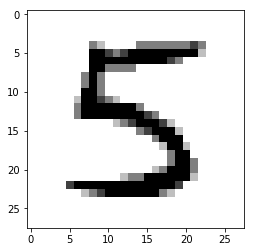

In [7]:
import matplotlib
import matplotlib.pyplot as plt
digit_image1 = X_train[1200].reshape(28, 28)

### Show that image
plt.imshow(digit_image1, cmap = matplotlib.cm.binary,
           interpolation="nearest")

In [8]:
### Import TensorFlow
import tensorflow as tf
import numpy as np

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [10]:
### Prepare Tensorflow placeholder
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [11]:
### Build DLL architectture - hidden & output layers
hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [12]:
### Set up loss function
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
loss_summary = tf.summary.scalar('log_loss', loss)

In [13]:
### Set up gradient descent and learning rate

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

In [14]:
### Set up Evaludation function
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [15]:
### Initialize all the variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [16]:
### Import 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Y value is : [6]


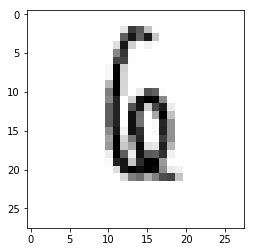

In [42]:

X_1=mnist.train.next_batch(1)
digit_image2 = X_1[0].reshape(28, 28)

### Show that image
print("Y value is :", X_1[1])
plt.imshow(digit_image2, cmap = matplotlib.cm.binary,
           interpolation="nearest")

In [18]:
n_epochs = 40
batch_size = 50

### Train your model
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                            y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)


0 Train accuracy: 0.9 Test accuracy: 0.9014
1 Train accuracy: 0.92 Test accuracy: 0.9198
2 Train accuracy: 1.0 Test accuracy: 0.931
3 Train accuracy: 1.0 Test accuracy: 0.9352
4 Train accuracy: 0.88 Test accuracy: 0.941
5 Train accuracy: 0.96 Test accuracy: 0.9473
6 Train accuracy: 0.98 Test accuracy: 0.9501
7 Train accuracy: 0.96 Test accuracy: 0.952
8 Train accuracy: 0.98 Test accuracy: 0.9539
9 Train accuracy: 0.9 Test accuracy: 0.9572
10 Train accuracy: 1.0 Test accuracy: 0.9586
11 Train accuracy: 0.96 Test accuracy: 0.9618
12 Train accuracy: 1.0 Test accuracy: 0.963
13 Train accuracy: 0.98 Test accuracy: 0.9648
14 Train accuracy: 0.96 Test accuracy: 0.9659
15 Train accuracy: 0.98 Test accuracy: 0.9678
16 Train accuracy: 1.0 Test accuracy: 0.9674
17 Train accuracy: 1.0 Test accuracy: 0.9688
18 Train accuracy: 0.98 Test accuracy: 0.9698
19 Train accuracy: 1.0 Test accuracy: 0.9711
20 Train accuracy: 1.0 Test accuracy: 0.9704
21 Train accuracy: 0.98 Test accuracy: 0.9719
22 Train acc

In [19]:
mnist.train.num_examples

55000

In [20]:
mnist.train

In [23]:
X_1=mnist.train.next_batch(1)

In [29]:
type(X_1)

tuple

In [33]:
len(X_1)

2

In [36]:
X_1[0].shape

(1, 784)

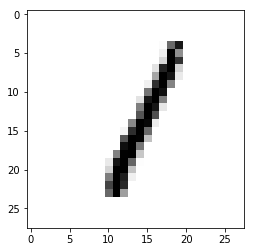